<a href="https://colab.research.google.com/github/jordi1215/quantum-reinforcement-learning/blob/main/SARSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from enum import Enum

# global variables
BOARD_ROWS = 20
BOARD_COLS = 20
WIN_STATE = (18, 18)
#WIN_STATE = (1,5)
START = (1, 1)
DETERMINISTIC = True

class Action(Enum):
    UP = 0
    DOWN = 1
    LEFT = 2
    RIGHT = 3
    TOPLEFT = 4
    TOPRIGHT = 5
    BOTTOMLEFT = 6
    BOTTOMRIGHT = 7

class GridWorld:
    def __init__(self, state=START):
        self.state = state
        self.isEnd = False
        # initialize the walls
        wall = set()
        for i in range(BOARD_COLS):
          wall.add((0,i))
          wall.add((BOARD_ROWS - 1,i))
          wall.add((i,0))
          wall.add((i,BOARD_COLS - 1))
        for i in range(4):
          wall.add((2, i+1))
        for i in range(7):
          wall.add((i+1,7))
        for i in range(2):
          wall.add((7,i+5))
        for i in range(8):
          wall.add((10,i+2))
        for i in range(3):
          wall.add((14+i,2))
        for i in range(6):
          wall.add((BOARD_ROWS - 4,i+2))
        for i in range(5):
          wall.add((14,8+i))
        for i in range(7):
          wall.add((12+i,BOARD_COLS-5))
        for i in range(4):
          wall.add((7,i+11))
        for i in range(4):
          wall.add((6,i+11))
        for i in range(4):
          wall.add((5,i+11))
        for i in range(4):
          wall.add((4,i+11))

        self.wall = wall

    def giveReward(self, state):
        if state == WIN_STATE:
            return 100
        else:
            return -1

    def isEndFunc(self):
        if self.state == WIN_STATE:
            return True
    def reset(self):
        self.state = START
        self.isEnd = False
        return self.state

    def nxtPosition(self, action):
        """
        action: up, down, left, right
        -------------
        0 | 1 | 2| 3|
        1 |
        2 |
        return next position
        """
        state = self.state
        nxtState = None
        if action == Action.UP or action == 0:
            nxtState = (self.state[0] - 1, self.state[1])
        elif action == Action.DOWN or action == 1:
            nxtState = (self.state[0] + 1, self.state[1])
        elif action == Action.LEFT or action == 2:
            nxtState = (self.state[0], self.state[1] - 1)
        elif action == Action.RIGHT or action == 3:
            nxtState = (self.state[0], self.state[1] + 1)
        elif action == Action.TOPLEFT or action == 4:
            nxtState = (self.state[0] - 1, self.state[1] - 1)
        elif action == Action.TOPRIGHT or action == 5:
            nxtState = (self.state[0] - 1, self.state[1] + 1)
        elif action == Action.BOTTOMLEFT or action == 6:
            nxtState = (self.state[0] + 1, self.state[1] - 1)
        elif action == Action.BOTTOMRIGHT or action == 7:
            nxtState = (self.state[0] + 1, self.state[1] + 1)
        # if next state legal
        if (nxtState[0] >= 0) and (nxtState[0] <= (BOARD_ROWS -1)):
            if (nxtState[1] >= 0) and (nxtState[1] <= (BOARD_COLS -1)):
                if nxtState not in self.wall:
                    state = nxtState
        
        return state, self.giveReward(state)
    
    def step(self, action):
        self.state, reward = self.nxtPosition(action)
        self.done = self.isEndFunc()
        return self.state, reward, self.done

    def showBoard(self):
        for i in range(0, BOARD_ROWS):
            # print('-----------------')
            print("")
            out = '| '
            for j in range(0, BOARD_COLS):
                if (i,j) in self.wall:
                    token = 'w'
                elif (i,j) == self.state:
                    token = '*'
                elif (i,j) == WIN_STATE:
                    token = 'G'
                else:
                    token = '0'
                out += token + ' | '
            print(out)
        print("")
        # print('-----------------')



In [ ]:
# global variables
BOARD_ROWS = 20
BOARD_COLS = 20
WIN_STATE = (18, 18)
START = (1, 1)
DETERMINISTIC = True
NUM_STATES = (BOARD_ROWS-2)*(BOARD_COLS-2)

class QGridWorld:
    DIRECTIONS = [(-1,0), (1, 0), (0, -1), (0, 1)] + [(-1, -1), (-1, 1), (1, -1), (1, 1)]

    def __init__(self, state=START):
        self.state = state
        self.done = False
        # initialize the walls
        wall = set()
        for i in range(BOARD_COLS):
          wall.add((0,i))
          wall.add((BOARD_ROWS - 1,i))
          wall.add((i,0))
          wall.add((i,BOARD_COLS - 1))
        for i in range(4):
          wall.add((2, i+1))
        for i in range(7):
          wall.add((i+1,7))
        for i in range(2):
          wall.add((7,i+5))
        for i in range(8):
          wall.add((10,i+2))
        for i in range(3):
          wall.add((14+i,2))
        for i in range(6):
          wall.add((BOARD_ROWS - 4,i+2))
        for i in range(5):
          wall.add((14,8+i))
        for i in range(7):
          wall.add((12+i,BOARD_COLS-5))
        for i in range(4):
          wall.add((7,i+11))
        for i in range(4):
          wall.add((6,i+11))
        for i in range(4):
          wall.add((5,i+11))
        for i in range(4):
          wall.add((4,i+11))

        self.wall = wall

    def giveReward(self):
        if self.state == WIN_STATE:
            return 100
        else:
            return -1

    def isEndFunc(self):
        if self.state == WIN_STATE:
            return True

    def nxtPosition(self, action):
        """
        action: up, down, left, right
        -------------
        0 | 1 | 2| 3|
        1 |
        2 |
        return next position
        """
        d = self.DIRECTIONS[action]
        nxtState = (self.state[0] + d[0], self.state[1] + d[1])
        # if next state legal
        if (0 < nxtState[0] <= (BOARD_ROWS -1)) and (0 < nxtState[1] <= (BOARD_COLS -1)):
                if nxtState not in self.wall:
                    self.state = nxtState
        return self.state

    def step(self, action):
        self.nxtPosition(action)
        self.done = self.isEndFunc()
        return self.state, self.giveReward(), self.done

    def showBoard(self):
        for i in range(0, BOARD_ROWS):
            # print('-----------------')
            print("")
            out = '| '
            for j in range(0, BOARD_COLS):
                if (i,j) in self.wall:
                    token = 'w'
                elif (i,j) == self.state:
                    token = '*'
                elif (i,j) == WIN_STATE:
                    token = 'G'
                else:
                    token = '0'
                out += token + ' | '
            print(out)
        print("")
        # print('-----------------')

    def reset(self):
        self.state = START
        self.done = False
        return self.state

    @staticmethod
    def state_num(state):
        return (state[0] - 1) * (BOARD_ROWS-2) + state[1] - 1

In [ ]:
import random
def td_0(
    env,  # our custom gridworld environment
    alpha: float,
    gamma: float,
    initV: np.array,
    num_episode: int,
    epislon: float,
):
    """
    implement TD(0) for estimating v

    input:
        env: target environment
        gamma: discounting factor
        pi: target evaluation policy
        n: n-step
        alpha: learning rate
        V: value function
        num_episode: #episodes to iterate
    output:
        None
    """
    v = initV
    steps = []
    step = 0
    for episode in range(num_episode):
        T = float("inf")
        s = env.reset()
        step = 0
        while True:
        # for _ in range(50):
            step += 1
            # epsilon greedy policy
            actions = []
            a = None
            if np.random.random() > epislon:
                next_state_up, up_reward = env.nxtPosition(Action.UP)
                next_state_down, down_reward = env.nxtPosition(Action.DOWN)
                next_state_left, left_reward = env.nxtPosition(Action.LEFT)
                next_state_right, right_reward = env.nxtPosition(Action.RIGHT)
                max_v = max([v[next_state_up] + up_reward, 
                               v[next_state_down] + down_reward,  
                               v[next_state_left] + left_reward,  
                               v[next_state_right] + right_reward])

                if v[next_state_up] + up_reward >= max_v:
                    actions.append(Action.UP)
                if v[next_state_down] + down_reward >= max_v:
                    actions.append(Action.DOWN)
                if v[next_state_left] + left_reward >= max_v:
                    actions.append(Action.LEFT)
                if v[next_state_right] + right_reward >= max_v:
                    actions.append(Action.RIGHT)
                a = random.choice(actions)
                # print('best')
            else:
                a = random.choice([Action.UP, Action.DOWN, Action.LEFT, Action.RIGHT])
            s_, r, done = env.step(a)
            v[s] = v[s] + alpha *(r+gamma*v[s_]-v[s])
            s = s_
            if done:
                steps.append(step)
                break
    # steps.append(step)
    return steps, v

In [ ]:
MAX_STEPS=6e3

def sarsa(
    env,  # our custom gridworld environment
    alpha: float,
    gamma: float,
    Q: np.array,
    num_episode: int,
    epsilon: float,
    diagonal: bool = False
):
    """
    implement TD(0) for estimating v

    input:
        env: target environment
        gamma: discounting factor
        pi: target evaluation policy
        n: n-step
        alpha: learning rate
        V: value function
        num_episode: #episodes to iterate
    output:
        None
    """

    steps = []
    step = 0
    num_actions = 8 if diagonal else 4
    for episode in range(num_episode):
        s = QGridWorld.state_num(env.reset())
        step = 0
        if np.random.random() > epsilon:
          a = np.argmax(Q[s])
        else:
          a = np.random.randint(num_actions)

        while step < MAX_STEPS:
            step += 1
            s_, r, done = env.step(a)
            s_ = QGridWorld.state_num(s_)
            if np.random.random() > epsilon:
              a_ = np.argmax(Q[s_])
            else:
              a_ = np.random.randint(num_actions)
            Q[s, a] = Q[s, a] + alpha *(r+gamma*Q[s_, a_]-Q[s, a])

            s, a = s_, a_
            if done:
                break
        steps.append(step)
    return steps, Q

In [ ]:
def sarsa_experiment(num_reps, **kwargs):
  env = QGridWorld()
  num_episodes = kwargs.get('num_episode')
  diagonal = kwargs.get("diagonal", False)
  num_actions = 8 if diagonal else 4
  steps = np.zeros((num_reps, num_episodes))
  for i in range(num_reps):
    initQ = np.zeros((BOARD_ROWS*BOARD_COLS, num_actions))
    steps[i], Q = sarsa(env, Q=initQ, **kwargs)
    
  percentiles = np.percentile(steps, np.array([25, 50, 75]), axis=0)
  err = np.std(steps, axis=0)
  plt.plot(percentiles[1], label="Median")
  plt.ylabel("Steps")
  plt.xlabel("Episodes")
  plt.title(f"SARSA alpha={kwargs['alpha']}, epsilon={0.01}")    
  plt.fill_between(np.arange(num_episodes), percentiles[0], percentiles[2],
                     alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848')
  plt.show()


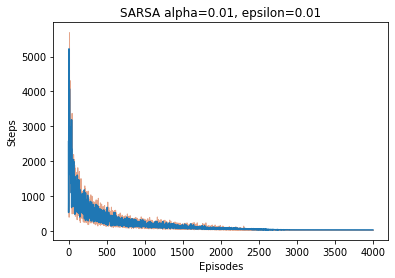

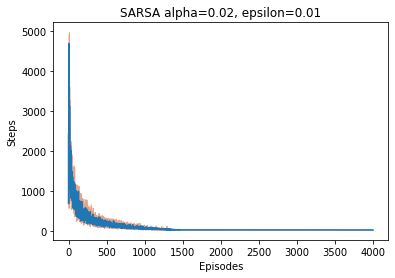

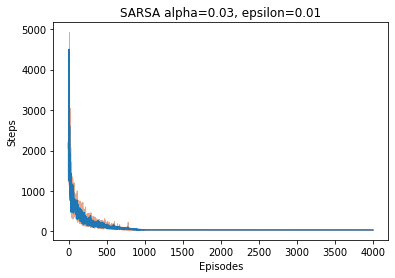

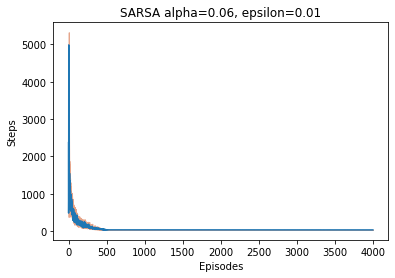

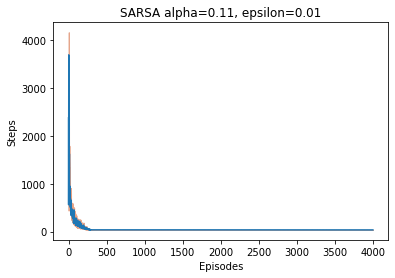

In [ ]:
import matplotlib.pyplot as plt
for alpha in [0.01, .02, .03, .06, .11]:
 sarsa_experiment(num_reps=10, alpha=alpha, gamma=0.99, num_episode=4000, epsilon=0.01)


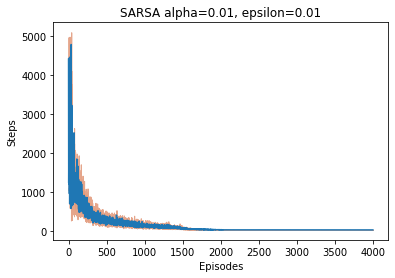

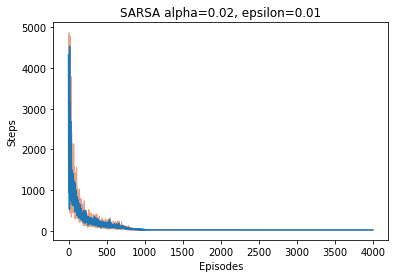

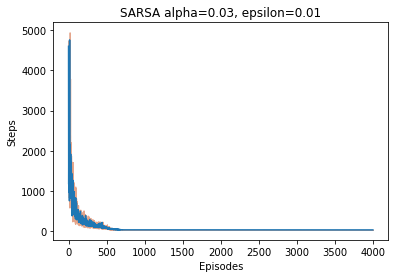

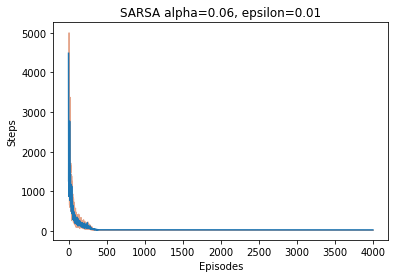

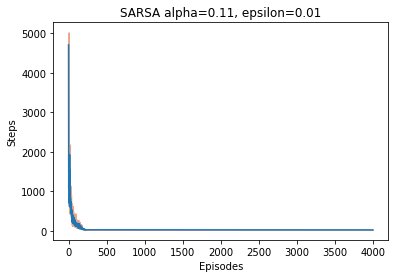

In [ ]:
for alpha in [0.01, .02, .03, .06, .11]:
 sarsa_experiment(num_reps=10, alpha=alpha, gamma=0.99, num_episode=4000, epsilon=0.01, diagonal=True)

[[ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.   34.72 36.13 37.6  39.02 39.91 -3.68  0.   -3.52 -3.51 -3.51 -3.5
  -3.49 -3.46 -3.43 -3.41 -3.37 -3.3  -3.14  0.  ]
 [ 0.    0.    0.    0.    0.   41.49 -3.19  0.   -3.52 -3.51 -3.49 -3.49
  -3.48 -3.47 -3.44 -3.41 -3.32 -3.14 -3.12  0.  ]
 [ 0.   -9.3  -9.52 -9.74 -2.94 43.06 -3.88  0.   -3.52 -3.52 -3.51 -3.49
  -3.49 -3.46 -3.42 -3.33 -3.14 -3.11 -3.12  0.  ]
 [ 0.   -9.26 -9.3  -9.44  2.75 44.72 -5.42  0.   -3.53 -3.52 -3.52  0.
   0.    0.    0.   -3.13 -2.96 -2.99 -3.09  0.  ]
 [ 0.   -9.16 -9.25 -0.88 48.34 45.63 -1.4   0.   -3.54 -3.53 -3.53  0.
   0.    0.    0.   -2.96 -1.74 -2.07 -2.99  0.  ]
 [ 0.   -8.99 -9.16 -0.25 50.45  3.07 -9.74  0.   -3.76 -3.55 -3.53  0.
   0.    0.    0.   -2.68  2.32  1.73 -2.66  0.  ]
 [ 0.   -8.76 -8.98  0.27 52.25  0.    0.    0.    5.89  4.01  9.76  0.
   0.    0.    0.   -2.45 11.56 11.53 -1.82  0.  ]
 [ 0.   -8.

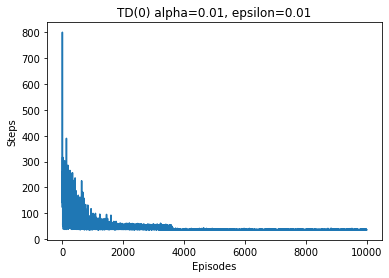

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
initV = np.zeros((BOARD_ROWS, BOARD_COLS))
env = GridWorld()
steps, v = td_0(env, alpha=0.01, gamma=0.99, initV=initV, num_episode= 10000, epislon=0.01)
plt.plot(steps)
plt.ylabel("Steps")
plt.xlabel("Episodes")
plt.title(f"TD(0) alpha={0.01}, epsilon={0.01}")
np.set_printoptions(precision=2)
# print(steps)
print(v)
# env.showBoard()
